## 1. Loading Data

In [1]:
train_file_path = r'day.csv'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

# Any results you write to the current directory are saved as output.
training_data_full = pd.read_csv(filepath_or_buffer = train_file_path, header = 0, encoding='utf-8')

In [3]:
training_data_full.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## 2. Preprocessing

In [4]:
def print_summary(pandas_data_frame):
    """
    Function to print the summary of a Pandas data frame, 
    1 - Shape
    2 - Head
    3 - Information : data types of columns, number of entries, space used up
    4 - Describe : mean, 25%ile, 50%ile, 75%ile, minimum, maximum for each NUMERICAL COLUMN
    """
    print("======================= Shape =======================")
    print(pandas_data_frame.shape)
    print("\n======================= Head =======================")
    print(pandas_data_frame.head())
    print("\n======================= Info =======================")
    print(pandas_data_frame.info())
    print("\n======================= Describe =======================")
    print(pandas_data_frame.describe(include='all'))
    return

def print_missing_values_info(pandas_data_frame):
    """
    Function to print information of missing values in a Pandas data frame. NAs
    """
    missing_values = pd.DataFrame(pandas_data_frame.isna().sum())
    missing_values = missing_values.reset_index()
    missing_values.columns = ['variables', 'n_missing_values']
    missing_values['missing_percentage'] = missing_values['n_missing_values']*100/pandas_data_frame.shape[0]
    print("======================= Shape =======================")
    print(pandas_data_frame.shape)
    print("\n======================= Missing Values Info =======================")
    print(missing_values)
    return

In [5]:
print_summary(training_data_full)

======================= Shape =======================
(731, 16)

======================= Head =======================
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0

In [6]:
print_missing_values_info(training_data_full)

======================= Shape =======================
(731, 16)

======================= Missing Values Info =======================
     variables  n_missing_values  missing_percentage
0      instant                 0                 0.0
1       dteday                 0                 0.0
2       season                 0                 0.0
3           yr                 0                 0.0
4         mnth                 0                 0.0
5      holiday                 0                 0.0
6      weekday                 0                 0.0
7   workingday                 0                 0.0
8   weathersit                 0                 0.0
9         temp                 0                 0.0
10       atemp                 0                 0.0
11         hum                 0                 0.0
12   windspeed                 0                 0.0
13      casual                 0                 0.0
14  registered                 0                 0.0
15         cnt     

There are no missing values & the type of data is consistent in all columns. 

In [7]:
clean_training_data = training_data_full.copy()

### Data Visualisation

In [8]:
def box_plot(y_axis_cols_list, x_axis_data_list, subplot_nrows, subplot_ncols, plot_heading='Box Plot'):
    """
    Plots boxplots for the columns in y_axis_cols_list & respective data in x_axis_data_list.
    Things to take care of:
    len(y_axis_cols_list) = len(x_axis_data_list) = subplot_ncols * subplot_nrows
    that means, if subplot_ncols = 6, subplot_nrows = 1, then the 
    number of columns for y_axis_cols_list & data in x_axis_data_list should be equal to 1*6 = 6
    y_axis_cols_list - string list
    x_axis_data_list - pandas dataframe list
    subplot_ncols, subplot_nrows - integer type
    """
    #Dividing the plotting area into subplots & storing the positions in ax matrix.
    #Each subplot can be accessed as indices of the matrix
    #Setting image size
    #plt.figure(figsize=(14,6))
    # squeeze = False parameter is being used because we are using only 1 row for subplots, so to avoid single axes indexing, squeeze = False
    fig, ax = plt.subplots(nrows = subplot_nrows, ncols = subplot_ncols, squeeze=False, figsize = (20,8))
    #Heading to the plot
    plot_title = plt.suptitle(plot_heading, fontsize = 'x-large')
    #Fits the plot into the specified figure size
    plt.tight_layout()
    #Plotting boxplots in the subplot area for each column
    for i in range(subplot_nrows):
        for j in range(subplot_ncols):
            list_index = subplot_ncols * i + j
            sns.boxplot(y=y_axis_cols_list[list_index], data=x_axis_data_list[list_index], ax=ax[i][j])
    fig.subplots_adjust(top = 0.9, right=0.9)
    plt.show()
    return

def hist_plot(y_axis_cols_list, x_axis_data_list, bins_list, subplot_nrows, subplot_ncols, plot_heading='Histogram Plot'):
    """
    Plots histogram plots for the columns in y_axis_cols_list & respective data in x_axis_data_list.
    Things to take care of:
    len(y_axis_cols_list) = len(x_axis_data_list) = len(bins_list) = subplot_ncols * subplot_nrows
    that means, if subplot_ncols = 6, subplot_nrows = 1, then the 
    number of columns for y_axis_cols_list & data in x_axis_data_list & integers in bins_list should be equal to 1*6 = 6
    y_axis_cols_list - string list
    x_axis_data_list - pandas dataframe list
    bins_list - integer list
    subplot_ncols, subplot_nrows - integer type
    """
    #Dividing the plotting area into subplots & storing the positions in ax matrix.
    #Each subplot can be accessed as indices of the matrix
    #Setting image size
    #plt.figure(figsize=(14,6))
    # squeeze = False parameter is being used because we are using only 1 row for subplots, so to avoid single axes indexing, squeeze = False
    fig, ax = plt.subplots(nrows = subplot_nrows, ncols = subplot_ncols, squeeze=False, figsize = (20,6))
    #Heading to the plot
    plot_title = plt.suptitle(plot_heading, fontsize = 'x-large')
    #Fits the plot into the specified figure size
    plt.tight_layout()
    #Plotting histogram plots in the subplot area for each column
    for i in range(subplot_nrows):
        for j in range(subplot_ncols):
            list_index = subplot_ncols * i + j
            data = x_axis_data_list[list_index]
            col = y_axis_cols_list[list_index]
            bins = bins_list[list_index]
            sns.distplot(data[col], ax=ax[i][j], bins=bins)
    fig.subplots_adjust(top = 0.9, right=0.9)
    plt.show()
    return

def bar_plot(categorical_list, subplot_nrows, subplot_ncols, plot_heading = 'Bar Plot', \
             pandas_data_frame = clean_training_data, plotting_method = 'mean'):
    """
    
    """
    #Dividing the plotting area into subplots & storing the positions in ax matrix.
    #Each subplot can be accessed as indices of the matrix
    #Setting image size
    #plt.figure(figsize=(14,6))
    # squeeze = False parameter is being used because we are using only 1 row for subplots,
    # so to avoid single axes indexing, squeeze = False
    fig, ax = plt.subplots(nrows = subplot_nrows, ncols = subplot_ncols, squeeze=False, figsize = (20,6))
    #Heading to the plot
    plot_heading = plot_heading + " : " + plotting_method
    plot_title = plt.suptitle(plot_heading, fontsize = 'x-large')
    #Fits the plot into the specified figure size
    plt.tight_layout()
    #Plotting barplots in the subplot area for each column
    for i in range(subplot_nrows):
        for j in range(subplot_ncols):
            list_index = subplot_ncols * i + j
            x_cat = categorical_list[list_index]
            group_temp = pandas_data_frame.groupby(by=x_cat)
#             temp1 = group_temp.count()
#             temp1['x_labels'] = temp1.index
#             temp1 = temp1[['onroad_distance', 'x_labels']]
#             x_axis = np.array(temp1['x_labels'])
            if plotting_method == 'mean':
                y_axis = np.array(group_temp.cnt.mean())
                x_axis = np.array(group_temp.cnt.mean().index)
            elif plotting_method == 'sum':
                y_axis = np.array(group_temp.cnt.sum())
                x_axis = np.array(group_temp.cnt.sum().index)
            elif plotting_method == 'count':
                y_axis = np.array(group_temp.cnt.count())
                x_axis = np.array(group_temp.cnt.count().index)
            sns.barplot(x=x_axis, y=y_axis, ax=ax[i][j])
    fig.subplots_adjust(top = 0.9, right=0.9)
    plt.show()
    return

In [9]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

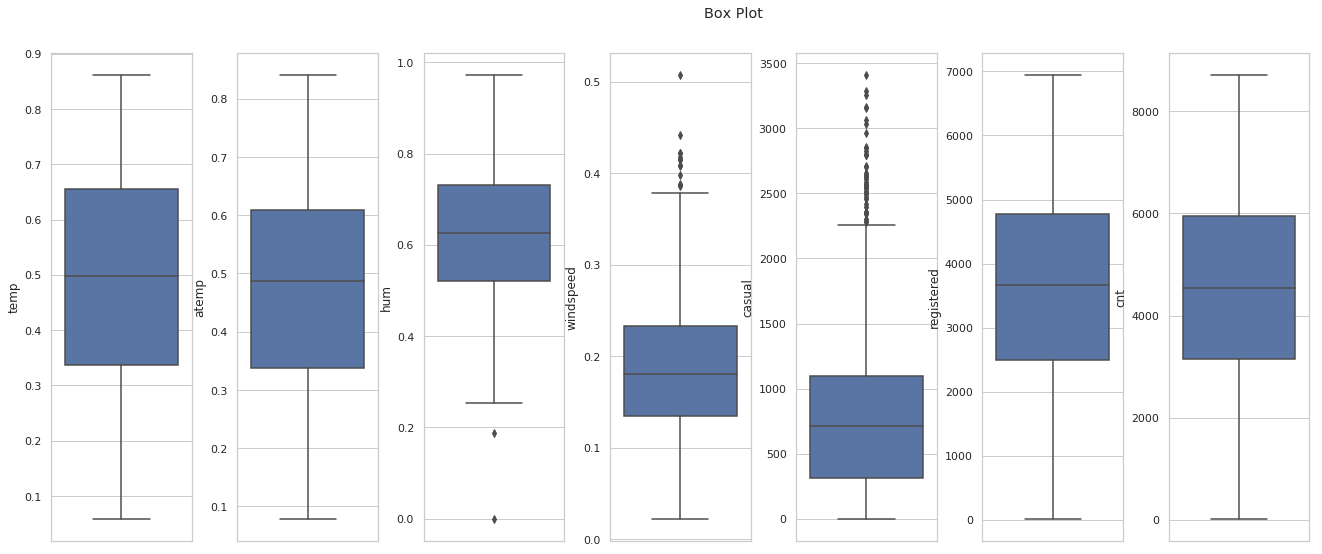

In [10]:
box_plot(x_axis_data_list=[clean_training_data,clean_training_data,clean_training_data,\
                          clean_training_data,clean_training_data,clean_training_data,\
                          clean_training_data], \
         y_axis_cols_list=numerical_columns,\
         subplot_ncols=7, subplot_nrows=1)

#### Insights
1. There is no noisy data
2. temp & atemp is within interquartile range, so no outliers as well
3. hum & windspeed some outliers

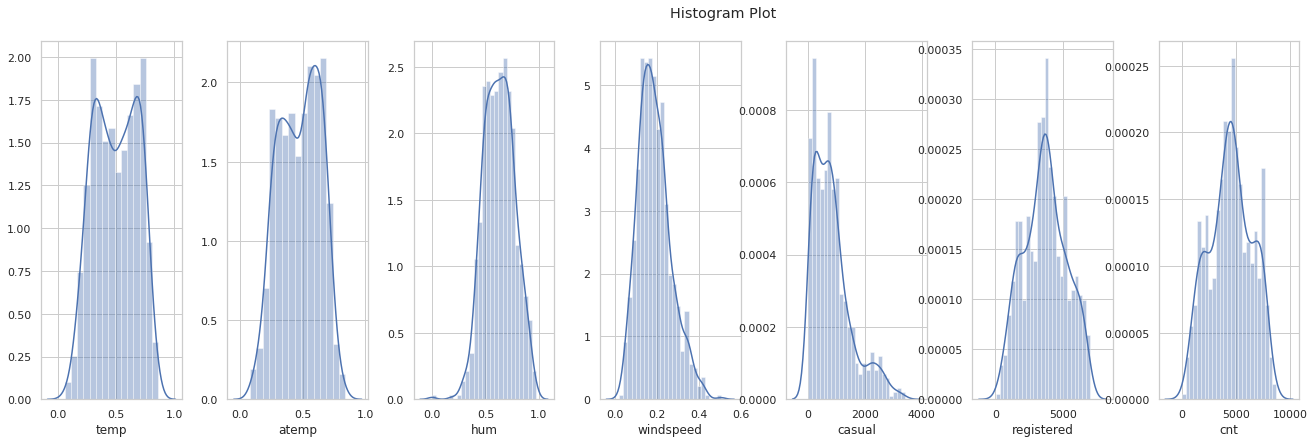

In [11]:
hist_plot(x_axis_data_list=[clean_training_data,clean_training_data,clean_training_data,\
                          clean_training_data,clean_training_data,clean_training_data,\
                          clean_training_data],\
         y_axis_cols_list=numerical_columns,\
         subplot_ncols=7, subplot_nrows=1,\
         bins_list=[15,15,25,25,25,25,25])

#### Insights
1. hum & windspeed are normally distributed
2. temp & atemp are centered in a small interval

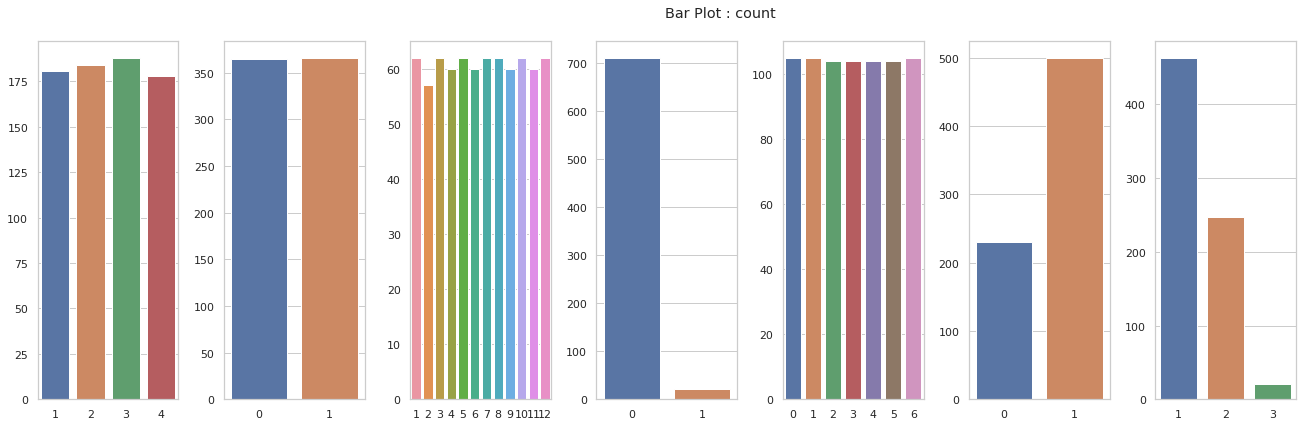

In [12]:
bar_plot(categorical_list=categorical_columns, subplot_ncols=7, subplot_nrows=1, plotting_method='count')

#### Insights
**1st bar plot** is the total number of observations in each season. Number of observations in each season is pretty much the same. Least being in winter & most being in fall. Although the difference is less than 10%, so it's not that big a deal to code it into the model.<br>
**2nd plot** is the total count of observations in each year. It is exactly the same in each year.<br>
**3rd plot** is for each month. Again, pretty much the same. A lower amount in February, but not a huge difference.<br>
**4th plot** is between, holiday or not and total count of bookings. On observations the count is really low. Could also be because the number of holidays is very less. Will have to see the mean graph for more info.<br>
**5th plot** is between days of the week & number of observations. Same. 0 - Sunday.<br>
**6th plot** is between working day & number of observations. High on working days, but could be as working days are more. Will have to see mean graph.<br>
**7th plot** is for weathersit. In the data given to us there is no booking for the 4th class - heavy rains. Only 3 bars are there. Highest bein when it's clear. Lowest for when there's a bit of rain or precipitation.

Conclusion: Training Data is pretty well distributed & can be used. We can ignore the 4th kind of precipitation in the data. 

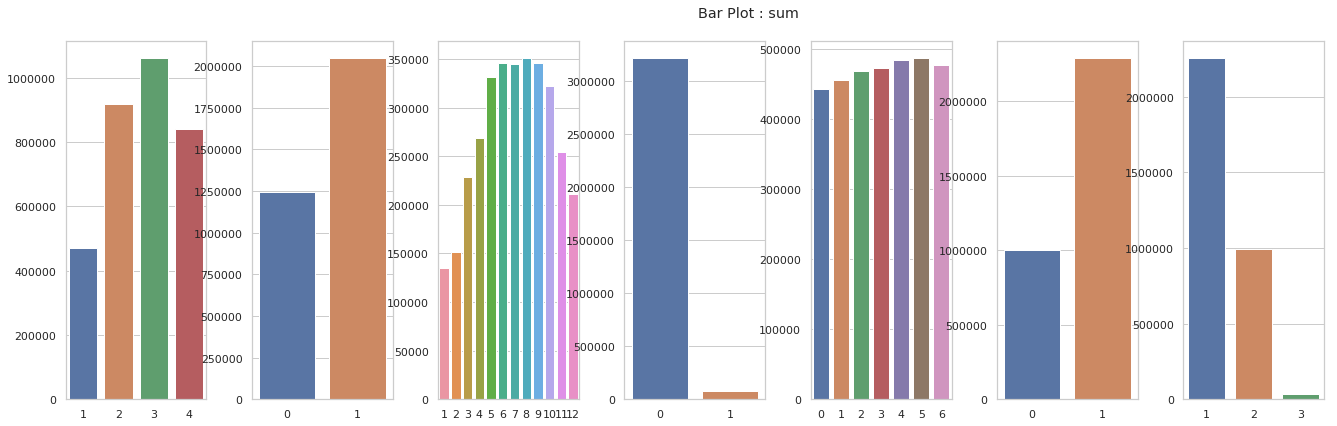

In [13]:
bar_plot(categorical_list=categorical_columns, subplot_ncols=7, subplot_nrows=1, plotting_method='sum')

#### Insights

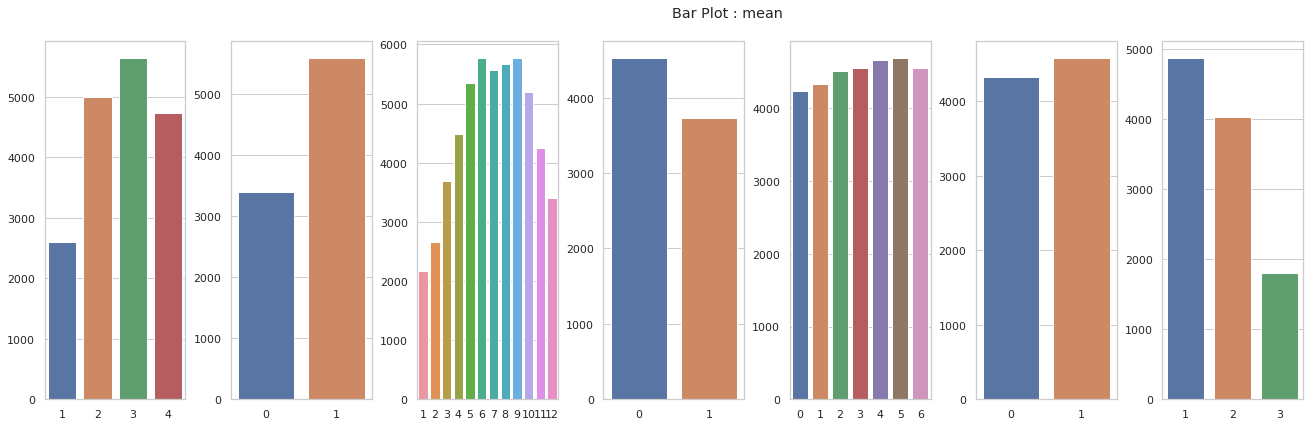

In [14]:
bar_plot(categorical_list=categorical_columns, subplot_ncols=7, subplot_nrows=1, plotting_method='mean')

#### Insights

## 3. Feature Engineering

In [15]:
clean_training_data[categorical_columns].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [16]:
print("============= Count of different Values of categorical features =============")
for i in categorical_columns:
    print(i)
    print(clean_training_data[i].value_counts())
    print("===================================================")

============= Count of different Values of categorical features =============
season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
yr
1    366
0    365
Name: yr, dtype: int64
mnth
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
holiday
0    710
1     21
Name: holiday, dtype: int64
weekday
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
workingday
1    500
0    231
Name: workingday, dtype: int64
weathersit
1    463
2    247
3     21
Name: weathersit, dtype: int64


In [17]:
clean_training_data.drop(columns=['instant','dteday'], inplace=True)
clean_training_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [18]:
temp = clean_training_data.head().copy()

In [19]:
def set_weekday(x):
    if (x == 0 or x == 6):
        return 0
    else:
        return 1

def unset_winter_month(x):
    if (x <= 3 or x == 12):
        return 0
    else:
        return 1

In [20]:
clean_training_data['weekday'] = clean_training_data['weekday'].apply(lambda x: set_weekday(x))
clean_training_data['mnth'] = clean_training_data['mnth'].apply(lambda x: unset_winter_month(x))
clean_training_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,0,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,0,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,0,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,0,0,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,1,0,0,0,1,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,1,0,0,0,1,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,1,0,0,0,0,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,1,0,0,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,1,0,0,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [21]:
print("============= Count of different Values of categorical features =============")
for i in categorical_columns:
    print(i)
    print(clean_training_data[i].value_counts())
    print("===================================================")

============= Count of different Values of categorical features =============
season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
yr
1    366
0    365
Name: yr, dtype: int64
mnth
1    488
0    243
Name: mnth, dtype: int64
holiday
0    710
1     21
Name: holiday, dtype: int64
weekday
1    521
0    210
Name: weekday, dtype: int64
workingday
1    500
0    231
Name: workingday, dtype: int64
weathersit
1    463
2    247
3     21
Name: weathersit, dtype: int64


In [22]:
# clean_training_data = temp

In [23]:
temp = clean_training_data.copy()

In [24]:
# Creating Dummy Variables
seasons_dummy = pd.get_dummies(clean_training_data['season'], drop_first=True, prefix='season:', prefix_sep='')
clean_training_data = clean_training_data.join(seasons_dummy)
clean_training_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season:2,season:3,season:4
0,1,0,0,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0
1,1,0,0,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0
2,1,0,0,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0
3,1,0,0,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0
4,1,0,0,0,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0
5,1,0,0,0,1,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,0,0,0
6,1,0,0,0,1,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,0,0,0
7,1,0,0,0,0,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,0,0,0
8,1,0,0,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,0,0,0
9,1,0,0,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,0,0,0


In [25]:
weathers_dummy = pd.get_dummies(clean_training_data['weathersit'], drop_first=True, prefix='weather:', prefix_sep='')
clean_training_data = clean_training_data.join(weathers_dummy)
clean_training_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season:2,season:3,season:4,weather:2,weather:3
0,1,0,0,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,1,0
1,1,0,0,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,1,0
2,1,0,0,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,0,0
3,1,0,0,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,0,0
4,1,0,0,0,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,0,0
5,1,0,0,0,1,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,0,0,0,0,0
6,1,0,0,0,1,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,0,0,0,1,0
7,1,0,0,0,0,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,0,0,0,1,0
8,1,0,0,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,0,0,0,0,0
9,1,0,0,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,0,0,0,0,0


In [26]:
clean_training_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season:2,season:3,season:4,weather:2,weather:3
0,1,0,0,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,1,0
1,1,0,0,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,1,0
2,1,0,0,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,0,0
3,1,0,0,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,0,0
4,1,0,0,0,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,0,0
5,1,0,0,0,1,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,0,0,0,0,0
6,1,0,0,0,1,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,0,0,0,1,0
7,1,0,0,0,0,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,0,0,0,1,0
8,1,0,0,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,0,0,0,0,0
9,1,0,0,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,0,0,0,0,0


### Finding Correlation & Dependency & Importance of Features

### Numerical Columns Test

##### Correlation

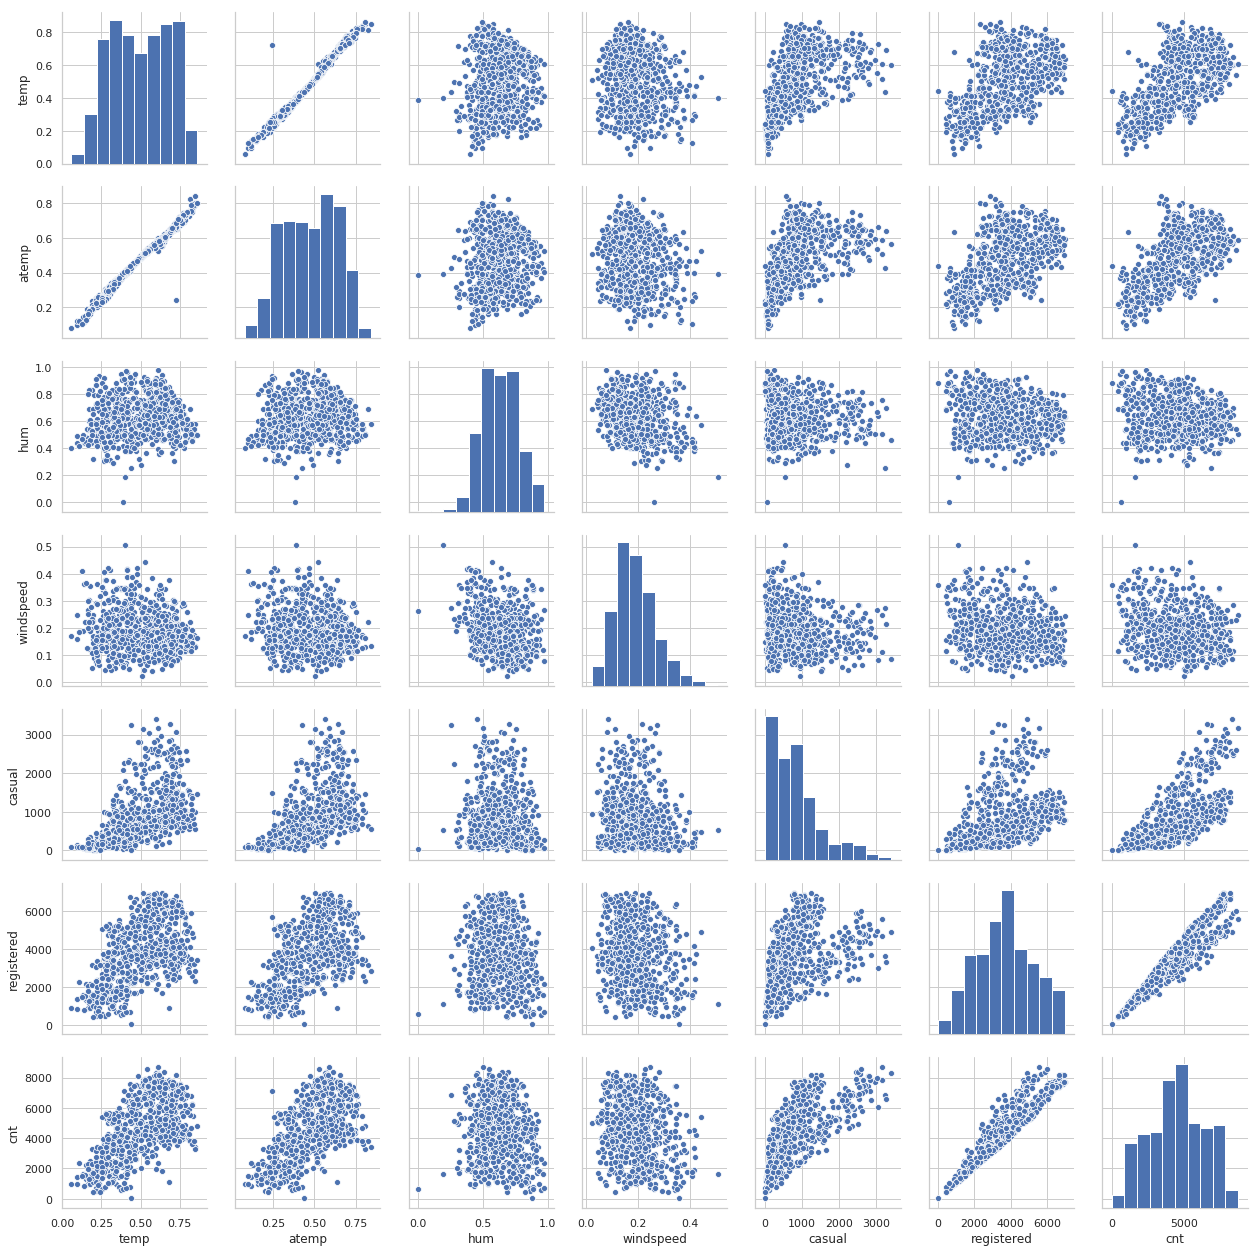

In [27]:
sns.pairplot(clean_training_data[numerical_columns])

In [28]:
correlation_coeff = clean_training_data[numerical_columns].corr()

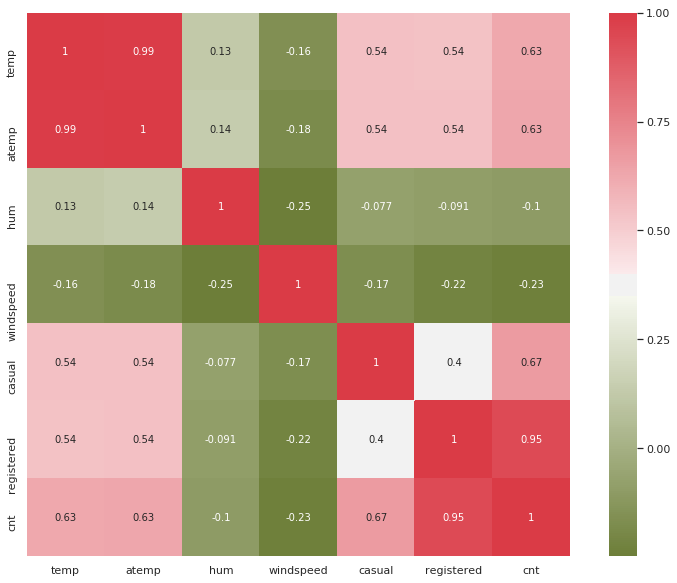

In [29]:
fig = plt.figure(figsize = (14,10))
sns.heatmap(data=correlation_coeff, square = True,\
            cmap = sns.diverging_palette(as_cmap=True, h_neg=100, h_pos=10),\
            annot= True)

#### Insights
1. <br>
2. <br>

0.00-0.19: very weak 0.20-0.39: weak 0.40-0.59: moderate 0.60-0.79: strong 0.80-1.00: very strong. Keeping correlation coefficient threshold at 0.8, we can drop aerial_distance or onroad_distance, but as onroad_distance has higher correlation with fare_amount, we will drop aerial_distance

Checking VIF - Variance Inflation Factor before & after dropping the COLLINEAR NUMERICAL VARIABLES/FEATURES

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif             
from statsmodels.tools.tools import add_constant
numerical_data = add_constant(clean_training_data[numerical_columns])
variance_if = pd.Series([vif(numerical_data.values, i) for i in range(numerical_data.shape[1])],\
                        index = numerical_data.columns)
variance_if.round(2)

/home/shitbot009/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/shitbot009/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const         53.19
temp          63.10
atemp         63.98
hum            1.19
windspeed      1.19
casual          inf
registered      inf
cnt             inf
dtype: float64

In [31]:
numerical_data = add_constant(clean_training_data[numerical_columns].drop(columns=['atemp','casual','registered']))
variance_if = pd.Series([vif(numerical_data.values, i) for i in range(numerical_data.shape[1])],\
                        index = numerical_data.columns)
variance_if.round(2)

const        49.33
temp          1.76
hum           1.17
windspeed     1.15
cnt           1.85
dtype: float64

#### Insights
1. <br>
2. <br>

##### Features Importance

In [32]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=300)
X_temp = clean_training_data.drop(columns=['cnt','casual','registered'])
y_temp = clean_training_data['cnt']
reg.fit(X=X_temp, y=y_temp)
feature_importance = pd.DataFrame({'Feature' : clean_training_data.drop\
                                   (columns=['cnt','casual','registered']).columns,
                                 'Importance_Fraction' : reg.feature_importances_})

In [33]:
feature_importance.sort_values(ascending=False, by='Importance_Fraction')

,Feature,Importance_Fraction
7,temp,0.346304
1,yr,0.289740
8,atemp,0.139138
9,hum,0.070721
0,season,0.053335
10,windspeed,0.038435
13,season:4,0.021232
6,weathersit,0.011511
15,weather:3,0.007679
2,mnth,0.004979


#### Insights
After checking VIF values, pairplots, heatmap & feature importances from the RandomForest attribute, I have decided to drop the following columns for the following reasons.<br>
- *atemp* : high correlation with temp variable & a lower importance
- *casual & registered* : as these are a part of target features and cannot really be used to predict the target variable because then there will be a ***Leakage***.

### Categorical Columns Test

#####  Chi-Square Test
scipy library<br>
p-value threshold assumption - **0.05**<br>
Our test is significant (i.e. we **reject the null hypothesis) if we get a p-value below our threshold**.<br>
*Null Hypothesis*: Ho - The pair of categorical variables are independent i.e. there is **NO RELATIONSHIP**<br>
*Alternate Hypothesis*: H1 - The pair of categorical variables are **not independent**<br>
https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

In [34]:
from scipy import stats

In [35]:
clean_training_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season:2', 'season:3', 'season:4', 'weather:2',
       'weather:3'],
      dtype='object')

In [36]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit','season:2', 'season:3', 'season:4', 'weather:2',
       'weather:3']

In [37]:
paired_features = [(i, j) for i in categorical_columns for j in categorical_columns]
def chi_square_test(pandas_data_frame=clean_training_data, categorical_features_list=categorical_columns):
    calc_p_vals = []
#     paired_features = [(i, j) for i in categorical_features_list for j in categorical_features_list]
    for feature in paired_features:
        if feature[0] != feature[1]:
            data = pd.crosstab(clean_training_data[feature[0]], clean_training_data[feature[1]])
            chi2_stat, p_val, deg_of_freedom, result = stats.chi2_contingency(data)
            calc_p_vals.append(round(p_val,2))
        else:
            calc_p_vals.append(-1)
    print("=========== P-Values Calculated ===========")
    print(calc_p_vals)
    return calc_p_vals

In [38]:
p_values = chi_square_test()
temp1 = pd.DataFrame(p_values, columns=['P-Values'])
chi_test_res = pd.DataFrame(paired_features, columns=['Feature_1', 'Feature_2'])
frames = [chi_test_res, temp1]
chi_test_res = pd.concat(frames, axis=1)

=========== P-Values Calculated ===========
[-1, 1.0, 0.0, 0.68, 0.98, 0.89, 0.02, 0.0, 0.0, 0.0, 0.05, 0.09, 1.0, -1, 0.98, 0.99, 0.95, 0.98, 0.13, 0.95, 0.95, 0.95, 0.98, 0.08, 0.0, 0.98, -1, 0.82, 0.9, 0.9, 0.14, 0.0, 0.0, 0.0, 0.06, 0.82, 0.68, 0.99, 0.82, -1, 0.01, 0.0, 0.6, 0.69, 0.65, 0.84, 0.78, 0.89, 0.98, 0.95, 0.9, 0.01, -1, 0.0, 0.39, 0.95, 0.92, 0.94, 0.26, 0.79, 0.89, 0.98, 0.9, 0.0, 0.0, -1, 0.25, 0.76, 0.73, 0.96, 0.2, 0.59, 0.02, 0.13, 0.14, 0.6, 0.39, 0.25, -1, 0.33, 0.01, 0.02, 0.0, 0.0, 0.0, 0.95, 0.0, 0.69, 0.95, 0.76, 0.33, -1, 0.0, 0.0, 0.34, 0.36, 0.0, 0.95, 0.0, 0.65, 0.92, 0.73, 0.01, 0.0, -1, 0.0, 0.01, 0.65, 0.0, 0.95, 0.0, 0.84, 0.94, 0.96, 0.02, 0.0, 0.0, -1, 0.43, 0.02, 0.05, 0.98, 0.06, 0.78, 0.26, 0.2, 0.0, 0.34, 0.01, 0.43, -1, 0.0, 0.09, 0.08, 0.82, 0.89, 0.79, 0.59, 0.0, 0.36, 0.65, 0.02, 0.0, -1]


In [39]:
chi_test_res

,Feature_1,Feature_2,P-Values
0,season,season,-1.00
1,season,yr,1.00
2,season,mnth,0.00
3,season,holiday,0.68
4,season,weekday,0.98
5,season,workingday,0.89
6,season,weathersit,0.02
7,season,season:2,0.00
8,season,season:3,0.00
9,season,season:4,0.00


In [40]:
for index, row in chi_test_res.iterrows():
    if row['P-Values'] < 0.05:
        print(chi_test_res[index:index+1])

  Feature_1 Feature_2  P-Values
0    season    season      -1.0
  Feature_1 Feature_2  P-Values
2    season      mnth       0.0
  Feature_1   Feature_2  P-Values
6    season  weathersit      0.02
  Feature_1 Feature_2  P-Values
7    season  season:2       0.0
  Feature_1 Feature_2  P-Values
8    season  season:3       0.0
  Feature_1 Feature_2  P-Values
9    season  season:4       0.0
   Feature_1 Feature_2  P-Values
13        yr        yr      -1.0
   Feature_1 Feature_2  P-Values
24      mnth    season       0.0
   Feature_1 Feature_2  P-Values
26      mnth      mnth      -1.0
   Feature_1 Feature_2  P-Values
31      mnth  season:2       0.0
   Feature_1 Feature_2  P-Values
32      mnth  season:3       0.0
   Feature_1 Feature_2  P-Values
33      mnth  season:4       0.0
   Feature_1 Feature_2  P-Values
39   holiday   holiday      -1.0
   Feature_1 Feature_2  P-Values
40   holiday   weekday      0.01
   Feature_1   Feature_2  P-Values
41   holiday  workingday       0.0
   Feature_1 F

#### Insights
1. <br>
2. Will also be dropping **'yr'**, as logically it isn't something that helps in prediction of counts in realtime<br>

In [41]:
clean_training_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season:2', 'season:3', 'season:4', 'weather:2',
       'weather:3'],
      dtype='object')

In [42]:
drop_columns = ['season','holiday','weathersit','atemp','casual','registered']

In [43]:
train_data = clean_training_data.drop(columns=drop_columns).copy()

In [44]:
train_data

,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,season:2,season:3,season:4,weather:2,weather:3
0,0,0,0,0,0.344167,0.805833,0.160446,985,0,0,0,1,0
1,0,0,0,0,0.363478,0.696087,0.248539,801,0,0,0,1,0
2,0,0,1,1,0.196364,0.437273,0.248309,1349,0,0,0,0,0
3,0,0,1,1,0.200000,0.590435,0.160296,1562,0,0,0,0,0
4,0,0,1,1,0.226957,0.436957,0.186900,1600,0,0,0,0,0
5,0,0,1,1,0.204348,0.518261,0.089565,1606,0,0,0,0,0
6,0,0,1,1,0.196522,0.498696,0.168726,1510,0,0,0,1,0
7,0,0,0,0,0.165000,0.535833,0.266804,959,0,0,0,1,0
8,0,0,0,0,0.138333,0.434167,0.361950,822,0,0,0,0,0
9,0,0,1,1,0.150833,0.482917,0.223267,1321,0,0,0,0,0


In [45]:
def is_in_iqr_range(num, col_name, pandas_data_frame):
    """
    Function to check if a given value is within the IQR range of that column or not
    num - float or integer type
    col_name - string type
    """
    q1 = np.quantile(np.array(pandas_data_frame[col_name]), 0.25)
    q3 = np.quantile(np.array(pandas_data_frame[col_name]), 0.75)
    iqr = q3 - q1
    lower_range = q1 - 1.5*iqr
    upper_range = q3 + 1.5*iqr
    if num >= lower_range and num <= upper_range:
        return True
    return False

def remove_outliers_iqr(cols_list, pandas_data_frame):
    """
    Function to remove the rows containing outlier values using IQR Range
    col_list - list of strings of columns names
    """
    initial_n_rows = pandas_data_frame.shape[0]
    for col in cols_list:
        pandas_data_frame = pandas_data_frame[pandas_data_frame[col].apply(lambda x: is_in_iqr_range(x, col, pandas_data_frame))]
    after_n_rows = pandas_data_frame.shape[0]
    n_rows_removed = initial_n_rows - after_n_rows
    print("Number of Rows removed = " + str(n_rows_removed) + "\n")
    return pandas_data_frame

In [46]:
train_data_iqr = remove_outliers_iqr(cols_list=['temp','hum','windspeed'], pandas_data_frame=train_data)

Number of Rows removed = 14



In [47]:
train_data_iqr.reset_index(inplace=True, drop=True)
train_data_iqr

,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,season:2,season:3,season:4,weather:2,weather:3
0,0,0,0,0,0.344167,0.805833,0.160446,985,0,0,0,1,0
1,0,0,0,0,0.363478,0.696087,0.248539,801,0,0,0,1,0
2,0,0,1,1,0.196364,0.437273,0.248309,1349,0,0,0,0,0
3,0,0,1,1,0.200000,0.590435,0.160296,1562,0,0,0,0,0
4,0,0,1,1,0.226957,0.436957,0.186900,1600,0,0,0,0,0
5,0,0,1,1,0.204348,0.518261,0.089565,1606,0,0,0,0,0
6,0,0,1,1,0.196522,0.498696,0.168726,1510,0,0,0,1,0
7,0,0,0,0,0.165000,0.535833,0.266804,959,0,0,0,1,0
8,0,0,0,0,0.138333,0.434167,0.361950,822,0,0,0,0,0
9,0,0,1,1,0.150833,0.482917,0.223267,1321,0,0,0,0,0


In [48]:
train_data_copy = train_data.copy()
train_data_iqr_copy = train_data_iqr.copy()

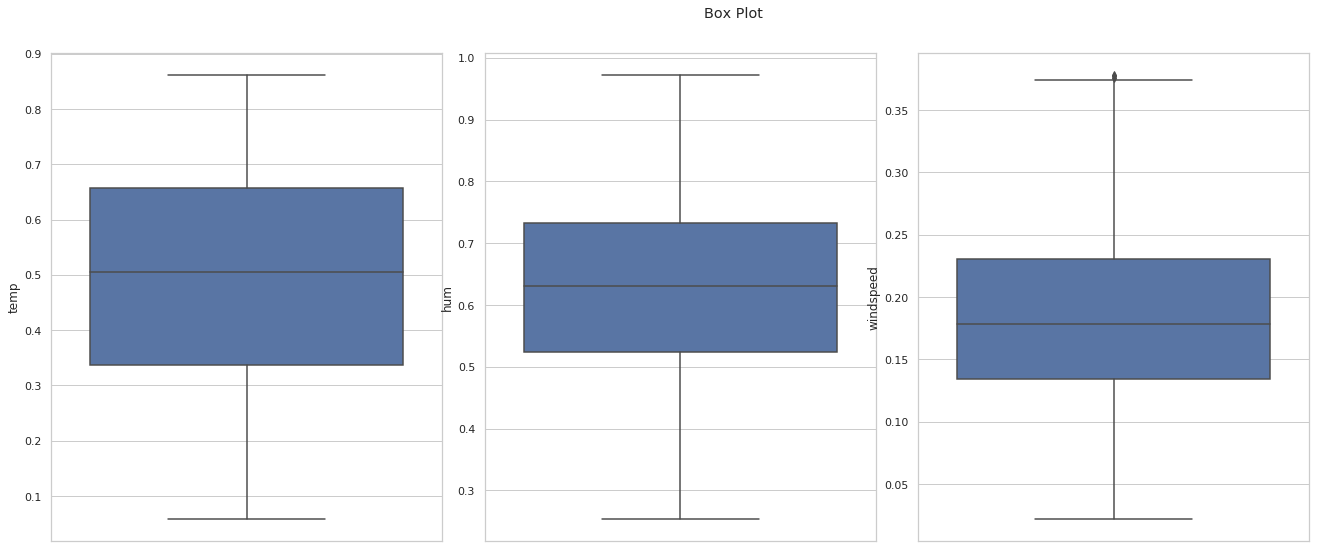

In [49]:
box_plot(x_axis_data_list=[train_data_iqr,train_data_iqr,train_data_iqr],\
         y_axis_cols_list=['temp','hum','windspeed'],\
         subplot_ncols=3, subplot_nrows=1)

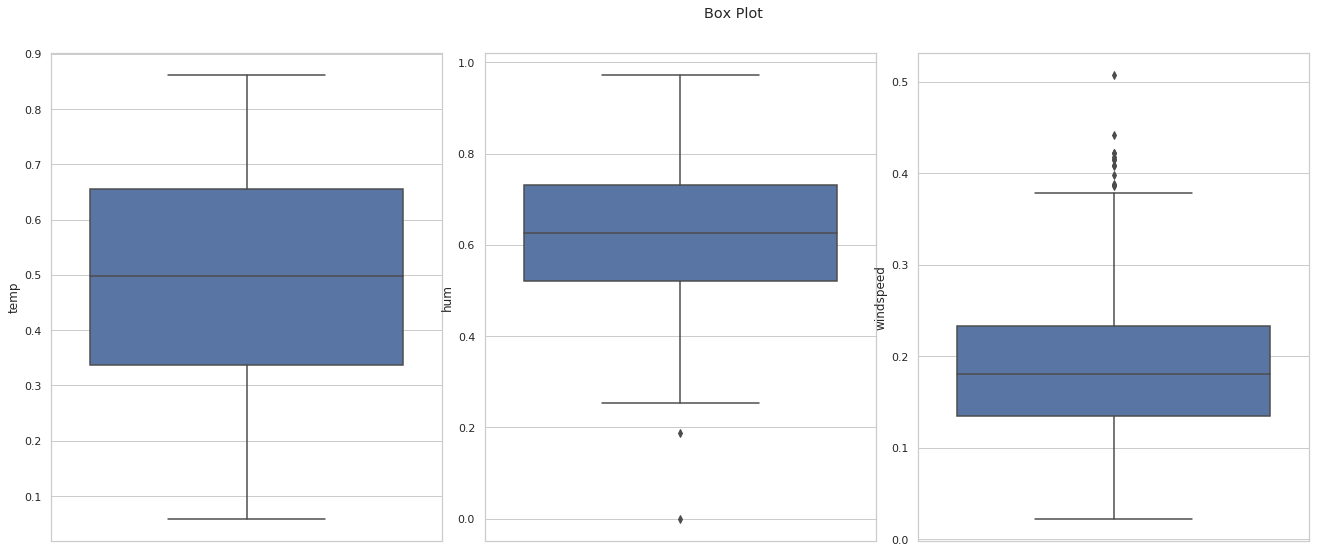

In [50]:
box_plot(x_axis_data_list=[train_data,train_data,train_data],\
         y_axis_cols_list=['temp','hum','windspeed'],\
         subplot_ncols=3, subplot_nrows=1)

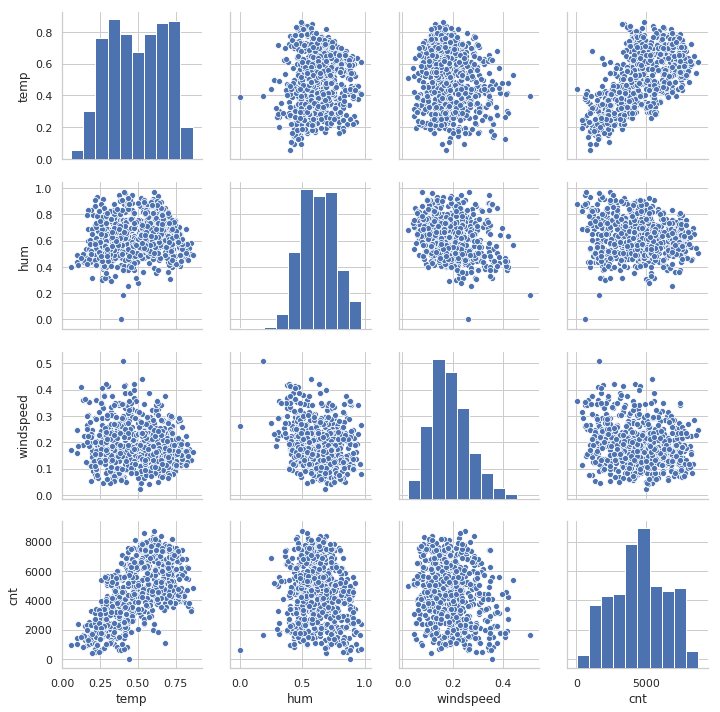

In [51]:
sns.pairplot(train_data[['temp','hum','windspeed','cnt']])

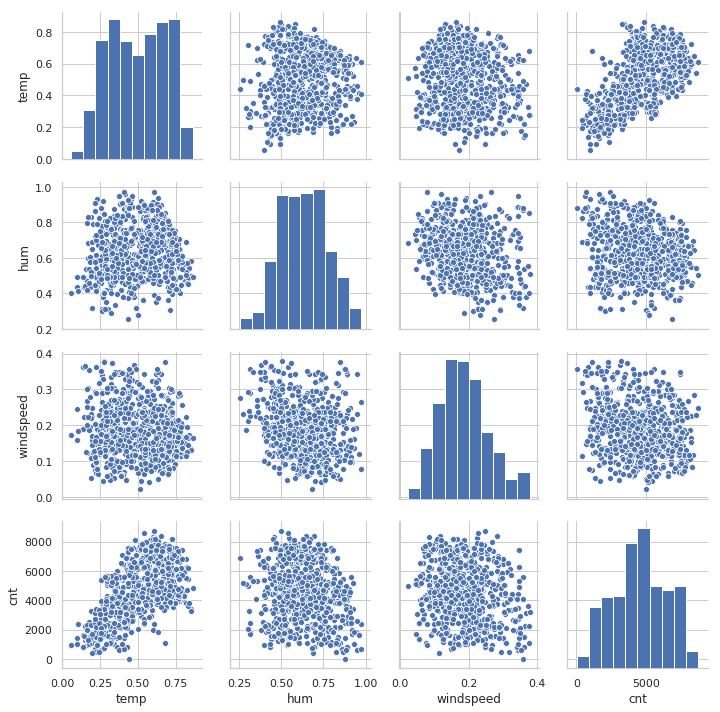

In [52]:
sns.pairplot(train_data_iqr[['temp','hum','windspeed','cnt']])

In [53]:
reg = RandomForestRegressor(n_estimators=300)
X_temp = train_data.drop(columns=['cnt'])
y_temp = train_data['cnt']
reg.fit(X=X_temp, y=y_temp)
feature_importance = pd.DataFrame({'Feature' : train_data.drop\
                                   (columns=['cnt']).columns,
                                 'Importance_Fraction' : reg.feature_importances_})
feature_importance.sort_values(ascending=False, by='Importance_Fraction')

,Feature,Importance_Fraction
4,temp,0.489065
0,yr,0.290750
5,hum,0.076022
9,season:4,0.052064
6,windspeed,0.044037
11,weather:3,0.013315
1,mnth,0.011867
7,season:2,0.006498
10,weather:2,0.006437
3,workingday,0.005483


In [54]:
print_summary(train_data)

======================= Shape =======================
(731, 13)

======================= Head =======================
   yr  mnth  weekday  workingday      temp       hum  windspeed   cnt  \
0   0     0        0           0  0.344167  0.805833   0.160446   985   
1   0     0        0           0  0.363478  0.696087   0.248539   801   
2   0     0        1           1  0.196364  0.437273   0.248309  1349   
3   0     0        1           1  0.200000  0.590435   0.160296  1562   
4   0     0        1           1  0.226957  0.436957   0.186900  1600   

   season:2  season:3  season:4  weather:2  weather:3  
0         0         0         0          1          0  
1         0         0         0          1          0  
2         0         0         0          0          0  
3         0         0         0          0          0  
4         0         0         0          0          0  

======================= Info =======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731

In [55]:
print_summary(train_data_iqr)

======================= Shape =======================
(717, 13)

======================= Head =======================
   yr  mnth  weekday  workingday      temp       hum  windspeed   cnt  \
0   0     0        0           0  0.344167  0.805833   0.160446   985   
1   0     0        0           0  0.363478  0.696087   0.248539   801   
2   0     0        1           1  0.196364  0.437273   0.248309  1349   
3   0     0        1           1  0.200000  0.590435   0.160296  1562   
4   0     0        1           1  0.226957  0.436957   0.186900  1600   

   season:2  season:3  season:4  weather:2  weather:3  
0         0         0         0          1          0  
1         0         0         0          1          0  
2         0         0         0          0          0  
3         0         0         0          0          0  
4         0         0         0          0          0  

======================= Info =======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717

In [56]:
train_data.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'cnt', 'season:2', 'season:3', 'season:4', 'weather:2', 'weather:3'],
      dtype='object')

In [57]:
final_columns = ['yr','mnth', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',\
                 'season:2', 'season:3', 'season:4', 'weather:2', 'weather:3']
final_numeric_columns = ['temp','hum','windspeed']
final_categorical_columns = ['yr','mnth', 'weekday', 'workingday','season:2', 'season:3',\
                             'season:4', 'weather:2', 'weather:3']
target_column = ['cnt']

## 4. Building & Training Models

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb
import joblib

In [59]:
X = train_data[final_columns].copy()
y = train_data[target_column].copy()
X_iqr = train_data_iqr[final_columns].copy()
y_iqr = train_data_iqr[target_column].copy()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_iqr, y_iqr, test_size = 0.2,\
                                                                    random_state = 27)

In [61]:
print(metrics.SCORERS.keys())
# List of all metrics that can be used. 
# Metrics commonly used for regression models
# 1. RMSE (Root Mean Squared Error), 2. R-Squared (%age variability explained), 3. MAE (Mean Absolute Error)

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


##### Metrics to be used to evaluate model performance
1. r2
2. neg_mean_absolute_error

In [62]:
def scoring_and_cv(reg_model, x, y, cv_folds, scoring_metric):
    reg_model.fit(x, y)
    cv_scores = cross_val_score(X=x, y=y, estimator=reg_model, cv=cv_folds,\
                              scoring=scoring_metric, n_jobs=-1)
    cv_scores_mean = -1 * cv_scores.mean()
    print("================ Train Data - Mean Absolute Error ================")
    print("Shows the Mean of Absolute Errors of Cross Validation runs ({:.0f} cv runs) on train data.".\
          format(cv_folds))
    print("Mean Absolute Error = {:.3f}".format(cv_scores_mean))
    print("The lower the MAE, the better the model works.")
    return cv_scores_mean

### 4.1 Linear Regression

In [63]:
linreg_model = LinearRegression(normalize=False, fit_intercept=True, n_jobs=-1)

In [64]:
model = linreg_model.fit(X_train, y_train)
linreg_model_mae = scoring_and_cv(reg_model=model, x=X_train, y=y_train, cv_folds=10,\
                                  scoring_metric='neg_mean_absolute_error')

================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 610.602
The lower the MAE, the better the model works.


### 4.2 Decision Trees

In [65]:
dt_model = DecisionTreeRegressor(random_state=527)

In [66]:
model = dt_model.fit(X_train, y_train)
dt_model_mae = scoring_and_cv(reg_model=model, x=X_train, y=y_train, cv_folds=10,\
                             scoring_metric='neg_mean_absolute_error')

================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 689.479
The lower the MAE, the better the model works.


### 4.3 Random Forests

In [67]:
rf_model = RandomForestRegressor(n_estimators=300, criterion='mae', n_jobs=-1, random_state=527)

In [68]:
model = rf_model.fit(X_train, y_train)
rf_model_mae = scoring_and_cv(reg_model=model, x=X_train, y=y_train, cv_folds=10,\
                             scoring_metric='neg_mean_absolute_error')

/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 514.051
The lower the MAE, the better the model works.


### 4.4 ExtraRandomised Trees (EXTRA Trees)

In [69]:
extra_reg_model = ExtraTreesRegressor(n_estimators=300, criterion='mae', n_jobs=-1, random_state=527)

In [70]:
model = extra_reg_model.fit(X_train, y_train)
extra_reg_model_mae = scoring_and_cv(reg_model=model, x=X_train, y=y_train, cv_folds=10,\
                             scoring_metric='neg_mean_absolute_error')

/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 489.622
The lower the MAE, the better the model works.


### 4.5 K-Nearest Neighbours

In [71]:
knn_model = KNeighborsRegressor(n_neighbors=10)

In [72]:
model = knn_model.fit(X_train, y_train)
knn_model_mae = scoring_and_cv(reg_model=model, x=X_train, y=y_train, cv_folds=10,\
                             scoring_metric='neg_mean_absolute_error')

================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 642.273
The lower the MAE, the better the model works.


### 4.6 SVM - Support Vector Machines

In [73]:
svr_model = SVR(kernel = 'rbf', tol=0.01, C=1, epsilon=0.05, gamma='scale')

In [74]:
model = svr_model.fit(X_train, y_train)
svr_model_mae = scoring_and_cv(reg_model=model, x=X_train, y=y_train, cv_folds=10,\
                             scoring_metric='neg_mean_absolute_error')

================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 1563.155
The lower the MAE, the better the model works.


/home/shitbot009/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shitbot009/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 4.7 XGBRegressor

In [77]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, n_jobs=-1)

In [78]:
model = xgb_model.fit(X_train, y_train)

In [79]:
svr_model_mae = scoring_and_cv(reg_model=model, x=X_train, y=y_train, cv_folds=10,\
                            scoring_metric='neg_mean_absolute_error')

================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 492.129
The lower the MAE, the better the model works.


### Hyperparameters Tuning for the top 2 models
1. EXTRA Trees
2. XGBRegressor

In [87]:
from sklearn.model_selection import GridSearchCV
extra_model_tuned = ExtraTreesRegressor(random_state=527, criterion='mae')
xgb_model_tuned = xgb.XGBRegressor(random_state=527, n_jobs=-1, objective='reg:squarederror', booster='dart',\
                                  colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1)

In [93]:
extra_parameters_grid = [{
    'n_estimators':[300,500,600,650,700,750],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,3,5],
    'max_features':['auto','sqrt','log2',0.75],
    'warm_start':[False, True]
}]
xgbreg_paramaters_grid = [{
    'gamma':[0,0.001,0.005,0.1],
    'learning_rate':[0.05,0.1,0.5,1], 
    'max_depth':[3,5,7], 
    'n_estimators':[300,500,600,700,750], 
    'reg_alpha':[0.1,0.5,0.05,1],
    'reg_lambda':[0.1,0.5,0.05,1],
    'subsample':[0.75,1]
}]

In [94]:
extra_grid_search = GridSearchCV(estimator=extra_model_tuned, param_grid=extra_parameters_grid,\
                                scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
xgb_grid_search = GridSearchCV(estimator=xgb_model_tuned, param_grid=xgbreg_paramaters_grid,\
                                scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)

In [95]:
extra_grid_search_res = extra_grid_search.fit(X_train, y_train)

/home/shitbot009/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/shitbot009/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [97]:
# ====================================== #
# Extremely Time Taking. Need a GPU for this. Ignoring it.
# ====================================== #
#xgb_grid_search_res = xgb_grid_search.fit(X_train, y_train)

In [98]:
extra_grid_search_res.best_params_

{'max_features': 0.75,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500,
 'warm_start': False}

In [100]:
extra_reg_tuned = ExtraTreesRegressor(random_state=527, criterion='mae', max_features=0.75,\
                                      min_samples_leaf=1, min_samples_split=6,\
                                      n_estimators=500, warm_start=False, n_jobs=-1)

In [101]:
best_model_1 = extra_reg_tuned.fit(X_train, y_train)
extra_reg_tuned_mae_1 = scoring_and_cv(reg_model=best_model_1, x=X_train, y=y_train, cv_folds=10,\
                             scoring_metric='neg_mean_absolute_error')

/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 479.807
The lower the MAE, the better the model works.


In [102]:
best_model_2 = extra_reg_tuned.fit(X_train_iqr, y_train_iqr)
extra_reg_tuned_mae_2 = scoring_and_cv(reg_model=best_model_2, x=X_train_iqr, y=y_train_iqr, cv_folds=10,\
                             scoring_metric='neg_mean_absolute_error')

/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/home/shitbot009/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


================ Train Data - Mean Absolute Error ================
Shows the Mean of Absolute Errors of Cross Validation runs (10 cv runs) on train data.
Mean Absolute Error = 476.999
The lower the MAE, the better the model works.


#### Finding MAE Scores on Test Data

In [131]:
y_pred_1 = best_model_1.predict(X_test)
y_pred_2 = best_model_1.predict(X_test_iqr)
y_pred_3 = best_model_2.predict(X_test)
y_pred_4 = best_model_2.predict(X_test_iqr)

In [132]:
from sklearn.metrics import mean_absolute_error

In [133]:
mae_1 = mean_absolute_error(y_pred=y_pred_1, y_true=y_test.values)
mae_2 = mean_absolute_error(y_pred=y_pred_2, y_true=y_test_iqr.values)
mae_3 = mean_absolute_error(y_pred=y_pred_3, y_true=y_test.values)
mae_4 = mean_absolute_error(y_pred=y_pred_4, y_true=y_test_iqr.values)

In [134]:
print("MAE - 1: "+str(mae_1))
print("MAE - 2: "+str(mae_2))
print("MAE - 3: "+str(mae_3))
print("MAE - 4: "+str(mae_4))

MAE - 1: 315.8937414965987
MAE - 2: 510.04681250000004
MAE - 3: 315.8937414965987
MAE - 4: 510.04681250000004


#### Writing the best performing model to disk
best_model_1

In [135]:
model_file_name = r'best_tuned_model.pkl'
joblib.dump(best_model_1, model_file_name)

['best_tuned_model.pkl']

##### Reading in the model to make predictions on unseen data

In [136]:
loaded_model = joblib.load(model_file_name)

In [137]:
y_pred_test_loading = loaded_model.predict(X_test)
mean_absolute_error(y_pred=y_pred_test_loading, y_true=y_test)
#Works Fine

315.8937414965987

#####  Sample Input & Output

In [138]:
sample_input = pd.read_csv('sample_input.csv', header=0)

In [139]:
sample_input

,temp,hum,windspeed,yr,mnth,weekday,workingday,season.2,season.3,season.4,weathersit.2,weathersit.3
0,0.653333,0.833333,0.214546,1,1,1,1,1,0,0,1,0
1,0.631667,0.504167,0.166667,1,1,0,0,1,0,0,0,0
2,0.568333,0.777917,0.174746,1,1,1,1,1,0,0,1,0
3,0.749167,0.422500,0.171650,1,1,1,1,0,1,0,0,0
4,0.827500,0.457917,0.194029,1,1,1,1,0,1,0,0,0
5,0.665833,0.844167,0.208967,1,1,1,1,0,1,0,1,0
6,0.667500,0.762500,0.093921,1,1,0,0,0,1,0,1,0
7,0.776667,0.596667,0.284813,1,1,1,1,0,1,0,0,0
8,0.793333,0.613333,0.257458,1,1,0,0,0,1,0,0,0
9,0.752500,0.654167,0.129354,1,1,1,1,0,1,0,1,0


In [140]:
sample_output = loaded_model.predict(sample_input)

In [144]:
sample_output

array([4491.912, 5490.663, 4251.029, 5123.721, 5279.504, 4350.639,
       5935.833, 5161.134, 5803.489, 4713.186, 5552.56 , 5066.229,
       4244.64 , 4806.167, 4880.797])